##                                      ASSIGNMENT 3

## NAME : ARVIND SHANKAR RAMAN
## NET ID : AXS170059

1.	Go to https://www.bls.gov/developers/api_python.htm, try to understand the sample code to retrieve BLS data series using API Version 1.

You may find the format of SeriesID here https://www.bls.gov/help/hlpforma.htm#CE
Based on the SeriesID definitions, retrieve the following data:

Seasonally adjusted (Seasonal Adjustment code) Average weekly earnings of all employees (Data type code) of Manufacturing, financial activities and Professional and business services (Super Sector Code) from Year 1980 to 2018 from this section.

Examine the trend of earnings using a graph and explain your findings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.tree.tests.test_export import w
import requests

### There are 2 main parts to the API Version 1.0 code. I use the first part to retrieve the BLS data by creating a user defined function called get_data. I call this function in a For loop to get 4 sets of data i.e json data from 1980-1989, 1990-1999, 2000-2009 and 2010-2018.

In [2]:
ids= ['CES3000000011', 'CES5500000011','CES6000000011']
f_names= [ ]
headers = {'Content-type': 'application/json'}
def get_data(from_year,to_year):
    data = json.dumps({"seriesid": ids, "startyear": from_year, "endyear": to_year})
    p = requests.post('https://api.bls.gov/publicAPI/v1/timeseries/data/', data=data, headers=headers)
    json_data = json.loads(p.text)
    f_name=from_year+to_year+"data"+".json"
    f_names.append(f_name)
    with open(f_name, 'w') as outfile:
        json.dump(json_data, outfile)

fromyear_list=["1980","1990","2000","2010"]
toyear_list=["1989","1999","2009","2018"]
for i in range(len(fromyear_list)):
    get_data(fromyear_list[i],toyear_list[i])

### The 2nd part of the API version 1.0's code is the use of pretty table. I use this code to generate the retrieved output in 2 formats:
### 1. as a pretty table format, denoted as x
### 2. as a dataframe,denoted as prettydf

In [3]:
import prettytable

In [4]:
prettydf = pd.DataFrame(columns=["series id","year","period","value"])
x=prettytable.PrettyTable(["series id","year","period","value"])

In [5]:
def make_prettydata(json_data):
    for series in json_data['Results']['series']:
        seriesId = series['seriesID']
        for item in series['data']:
            year = item['year']
            period = item['periodName']
            value = item['value']
            x.add_row([seriesId,year,period,value])
            prettydf.loc[len(prettydf)] =[seriesId,year,period,value]

In [6]:
for i in f_names:
    with open(i) as json_data:
        jl = json.load(json_data)
        print(jl)
        make_prettydata(jl)

{'status': 'REQUEST_SUCCEEDED', 'responseTime': 270, 'message': ['No Data Available for Series CES3000000011 Year: 1980', 'No Data Available for Series CES3000000011 Year: 1981', 'No Data Available for Series CES3000000011 Year: 1982', 'No Data Available for Series CES3000000011 Year: 1983', 'No Data Available for Series CES3000000011 Year: 1984', 'No Data Available for Series CES3000000011 Year: 1985', 'No Data Available for Series CES3000000011 Year: 1986', 'No Data Available for Series CES3000000011 Year: 1987', 'No Data Available for Series CES3000000011 Year: 1988', 'No Data Available for Series CES3000000011 Year: 1989', 'No Data Available for Series CES5500000011 Year: 1980', 'No Data Available for Series CES5500000011 Year: 1981', 'No Data Available for Series CES5500000011 Year: 1982', 'No Data Available for Series CES5500000011 Year: 1983', 'No Data Available for Series CES5500000011 Year: 1984', 'No Data Available for Series CES5500000011 Year: 1985', 'No Data Available for 

{'status': 'REQUEST_SUCCEEDED', 'responseTime': 247, 'message': [], 'Results': {'series': [{'seriesID': 'CES3000000011', 'data': [{'year': '2018', 'period': 'M12', 'periodName': 'December', 'value': '1117.80', 'footnotes': [{}]}, {'year': '2018', 'period': 'M11', 'periodName': 'November', 'value': '1111.39', 'footnotes': [{}]}, {'year': '2018', 'period': 'M10', 'periodName': 'October', 'value': '1108.13', 'footnotes': [{}]}, {'year': '2018', 'period': 'M09', 'periodName': 'September', 'value': '1110.03', 'footnotes': [{}]}, {'year': '2018', 'period': 'M08', 'periodName': 'August', 'value': '1111.51', 'footnotes': [{}]}, {'year': '2018', 'period': 'M07', 'periodName': 'July', 'value': '1108.23', 'footnotes': [{}]}, {'year': '2018', 'period': 'M06', 'periodName': 'June', 'value': '1105.53', 'footnotes': [{}]}, {'year': '2018', 'period': 'M05', 'periodName': 'May', 'value': '1100.38', 'footnotes': [{}]}, {'year': '2018', 'period': 'M04', 'periodName': 'April', 'value': '1104.95', 'footnot

Displaying the pretty table.

In [7]:
print(x)

+---------------+------+-----------+---------+
|   series id   | year |   period  |  value  |
+---------------+------+-----------+---------+
| CES3000000011 | 2009 |  December |  918.26 |
| CES3000000011 | 2009 |  November |  918.32 |
| CES3000000011 | 2009 |  October  |  908.62 |
| CES3000000011 | 2009 | September |  906.70 |
| CES3000000011 | 2009 |   August  |  903.99 |
| CES3000000011 | 2009 |    July   |  898.59 |
| CES3000000011 | 2009 |    June   |  890.87 |
| CES3000000011 | 2009 |    May    |  887.80 |
| CES3000000011 | 2009 |   April   |  891.65 |
| CES3000000011 | 2009 |   March   |  887.80 |
| CES3000000011 | 2009 |  February |  893.49 |
| CES3000000011 | 2009 |  January  |  885.36 |
| CES3000000011 | 2008 |  December |  884.83 |
| CES3000000011 | 2008 |  November |  890.44 |
| CES3000000011 | 2008 |  October  |  890.87 |
| CES3000000011 | 2008 | September |  881.50 |
| CES3000000011 | 2008 |   August  |  886.98 |
| CES3000000011 | 2008 |    July   |  882.99 |
| CES30000000

### Displaying the retrieved Bls data as a organized dataframe.

In [8]:
print(prettydf)

         series id  year     period    value
0    CES3000000011  2009   December   918.26
1    CES3000000011  2009   November   918.32
2    CES3000000011  2009    October   908.62
3    CES3000000011  2009  September   906.70
4    CES3000000011  2009     August   903.99
5    CES3000000011  2009       July   898.59
6    CES3000000011  2009       June   890.87
7    CES3000000011  2009        May   887.80
8    CES3000000011  2009      April   891.65
9    CES3000000011  2009      March   887.80
10   CES3000000011  2009   February   893.49
11   CES3000000011  2009    January   885.36
12   CES3000000011  2008   December   884.83
13   CES3000000011  2008   November   890.44
14   CES3000000011  2008    October   890.87
15   CES3000000011  2008  September   881.50
16   CES3000000011  2008     August   886.98
17   CES3000000011  2008       July   882.99
18   CES3000000011  2008       June   887.60
19   CES3000000011  2008        May   881.60
20   CES3000000011  2008      April   875.20
21   CES30

In [9]:
prettydf['value'] = prettydf['value'].astype(float)

In [10]:
from datetime import datetime

In [11]:
xx=[ ]
for i in range(len(prettydf)):
    s = prettydf['year'][i]+", "+prettydf['period'][i]
    d = datetime.strptime(s, '%Y, %B')
    xx.append(d)
prettydf['time']=pd.Series(xx)

In [12]:
prettydf['value'] = prettydf['value'].astype(float)
prettydf['time'] = pd.to_datetime(prettydf['time'], unit='s')

In [13]:
prettydf.head()

,series id,year,period,value,time
0,CES3000000011,2009,December,918.26,2009-12-01
1,CES3000000011,2009,November,918.32,2009-11-01
2,CES3000000011,2009,October,908.62,2009-10-01
3,CES3000000011,2009,September,906.70,2009-09-01
4,CES3000000011,2009,August,903.99,2009-08-01


In [14]:
import seaborn as sns

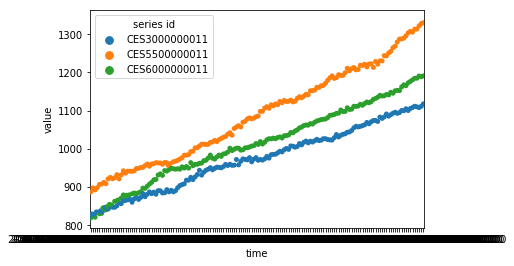

In [15]:
ax = sns.swarmplot(x='time', y='value', data=prettydf,hue='series id')

## The plot clearly shows that the weekly earnings of all 3 industries namely ,financial activities,manufacturing and Professional and business services are all increasing steadily over the years. Also, the weekly earnings of employees in the financial activities is the highest among all the 3 sectors, followed by employees in the professional and business services.

2.	Download “Player_Attributes.csv” from eLearning. 
Check the number of unique values of the two IDs “player_fifa_api_id” and “player_api_id”. 
It turns out that the two numbers do not match. 
What does this mean? Write a program to find the id combinations where “player_api_id” has multiple matches of “player_fifa_api_id”.

In [16]:
pl_at = pd.read_csv('Player_Attributes.csv')

In [17]:
pl_at.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 43 columns):
Unnamed: 0             183978 non-null int64
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_con

### Checking for no. of unique values in both the columns.

In [18]:
pl_at['player_fifa_api_id'].nunique()

11062

In [19]:
pl_at['player_api_id'].nunique()

11060

### Checking for null values in both the columns.

In [20]:
pl_at['player_fifa_api_id'].isnull().any()

False

In [21]:
pl_at['player_api_id'].isnull().any()

False

In [22]:
new_pl = pl_at[['player_fifa_api_id','player_api_id']]
print(new_pl.shape)

(183978, 2)


### Dropping the duplicates in the dataframe.

In [23]:
new_pl.drop_duplicates(keep='first', inplace=True)
print(new_pl.shape)

(11069, 2)


c:\users\91909\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
new_pl['player_fifa_api_id'].nunique()

11062

### Yes player_fifa_api_id has 11062 values and player_api_id has 11060 values.The reason behind this must be the fact that a single player_api_id contains multiple values of the same player_fifa_api_id. 

In [25]:
new_pl_1=new_pl.groupby('player_api_id').size().reset_index(name='counts')
new_pl_1.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 2 columns):
player_api_id    11060 non-null int64
counts           11060 non-null int64
dtypes: int64(2)
memory usage: 172.9 KB


In [26]:
new_pl_1.head()

,player_api_id,counts
0,2625,1
1,2752,1
2,2768,1
3,2770,1
4,2790,1


In [27]:
new_pl_2 =new_pl_1[new_pl_1['counts']>1]

In [28]:
new_pl_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 121 to 7887
Data columns (total 2 columns):
player_api_id    9 non-null int64
counts           9 non-null int64
dtypes: int64(2)
memory usage: 216.0 bytes


In [29]:
output = pd.DataFrame(columns=['player_api_id','player_fifa_api_id'])

In [30]:
for x in range(len(new_pl['player_api_id'])):
    if new_pl.iloc[x,1] in list(new_pl_2['player_api_id']):
        output.loc[len(output)] =[new_pl.iloc[x,1],new_pl.iloc[x,0]]

## Output contains the required combination where "player_api_id" had multiple matches of "player_fifa_api_id".

In [31]:
print(output)

   player_api_id player_fifa_api_id
0         150396             186613
1         150396             192635
2         163838             198033
3         163838             198394
4          32968              51384
5          32968             118359
6          11285             202486
7          11285             208618
8          37254             177485
9          37254             190195
10        110189             148581
11        110189             200529
12        193866             148337
13        193866             197937
14         42116             158428
15         42116             184431
16         30271             135804
17         30271             206652


### The no. of id combinations where “player_api_id” has multiple matches of “player_fifa_api_id” is 18.